# Exploración de datos
### Security Data Science -- Laboratorio 3
#### Adrian Rodriguez 21619
#### Jose Daniel Gomez Cabrera 21429

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.decomposition import TruncatedSVD

Cargar el dataset

In [26]:
df = pd.read_csv('./data/MalBehavD-V1-dataset.csv')

Cargar los preprocesadores para poder ser usados en el 2do modelo

In [27]:
X_train_tfidf = np.load('./preprocessors/X_train_tfidf.npy')
X_test_tfidf = np.load('./preprocessors/X_test_tfidf.npy')
y_train = np.load('./preprocessors/y_train.npy')
y_test = np.load('./preprocessors/y_test.npy')

Utilizamos embeddings de clasificacion

In [28]:
# AQUI DEBERIA DE IR LOS EMBEDDINGS DE GEMINI


# Reducimos a 100 dimensiones para simular los embeddings
svd = TruncatedSVD(n_components=100, random_state=42)
X_train_embeddings = svd.fit_transform(X_train_tfidf)
X_test_embeddings = svd.transform(X_test_tfidf)

Normalizacion de los datos

In [29]:
scaler = StandardScaler()
X_train_embeddings = scaler.fit_transform(X_train_embeddings)
X_test_embeddings = scaler.transform(X_test_embeddings)

print(f"Dimensiones de X_train_embeddings: {X_train_embeddings.shape}")
print(f"Dimensiones de X_test_embeddings: {X_test_embeddings.shape}")

Dimensiones de X_train_embeddings: (1799, 100)
Dimensiones de X_test_embeddings: (771, 100)


In [30]:
np.save('./embiddings/X_train_embeddings.npy', X_train_embeddings)
np.save('./embiddings/X_test_embeddings.npy', X_test_embeddings)
pickle.dump(svd, open('./embiddings/embedding_svd.pkl', 'wb'))
pickle.dump(scaler, open('./embiddings/embedding_scaler.pkl', 'wb'))

Semilla para poder reproducir los resultados

In [31]:
np.random.seed(42)
tf.random.set_seed(42)

Modelo de red neuronal

In [32]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_embeddings.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compilar modelo de NN

In [33]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

Resumen del modelo

In [34]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                │ (None, 64)             │         6,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,577 (33.50 KB)

 Trainable params: 8,577 (33.50 KB)

 Non-trainable params: 0 (0.00 B)

Entrenamos la red neuronal

In [35]:
history = model.fit(
    X_train_embeddings, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=32,
    verbose=1
)

Epoch 1/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5487 - loss: 0.8035 - precision_1: 0.5989 - recall_1: 0.2952 - val_accuracy: 0.7778 - val_loss: 0.5210 - val_precision_1: 0.7448 - val_recall_1: 0.8218
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - accuracy: 0.7735 - loss: 0.5296 - precision_1: 0.7970 - recall_1: 0.7331 - val_accuracy: 0.9056 - val_loss: 0.3624 - val_precision_1: 0.8933 - val_recall_1: 0.9138
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - accuracy: 0.8592 - loss: 0.3895 - precision_1: 0.8641 - recall_1: 0.8533 - val_accuracy: 0.9417 - val_loss: 0.2426 - val_precision_1: 0.9422 - val_recall_1: 0.9368
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - accuracy: 0.9003 - loss: 0.2770 - precision_1: 0.9009 - recall_1: 0.8988 - val_accuracy: 0.9528 - val_loss: 0.1636 - val_precision_1: 0.9645 - val_recall_1: 0.9368
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - accuracy: 0.9225 - loss: 0.2330 - precision_1: 0.9358 - recall_1: 0.9065 - v

Historial de entrenamiento

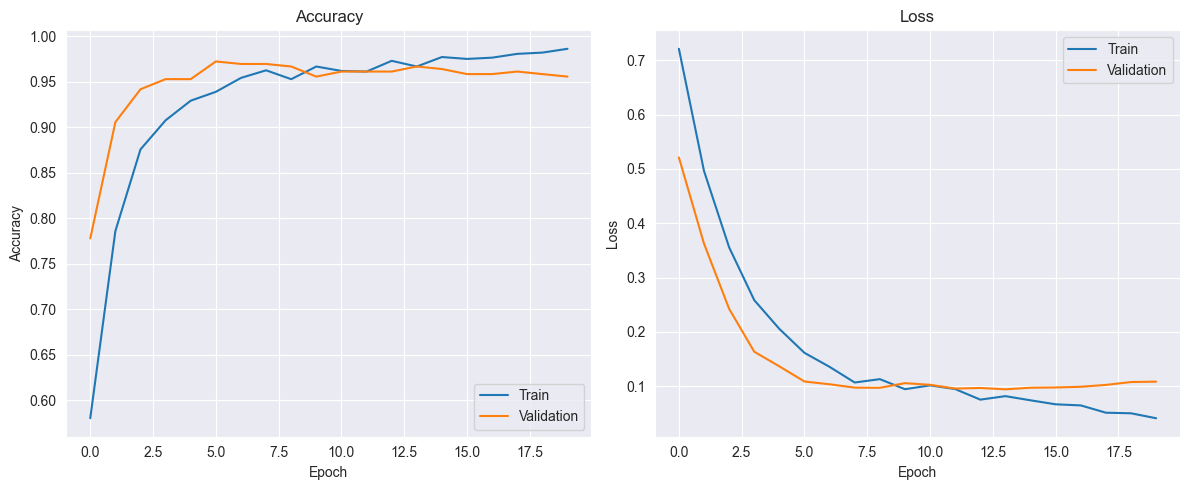

In [36]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig('./model_results/training_history_model2.png')

Evaluar el modelo con el conjunto de prueba

In [37]:
y_pred_prob = model.predict(X_test_embeddings).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step


Metricas de evaluacion

In [38]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print("\nEvaluación en el conjunto de prueba:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")


Evaluación en el conjunto de prueba:
Accuracy: 0.9611
Precision: 0.9659
Recall: 0.9558
F1 Score: 0.9608
ROC AUC: 0.9837


Matriz de confusion

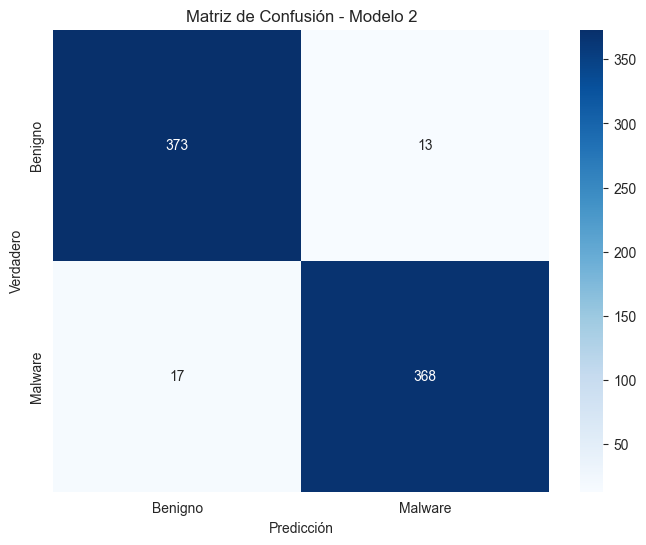

In [39]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benigno', 'Malware'],
            yticklabels=['Benigno', 'Malware'])
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión - Modelo 2')
plt.savefig('./model_results/confusion_matrix_model2.png')

Curvas de ROC

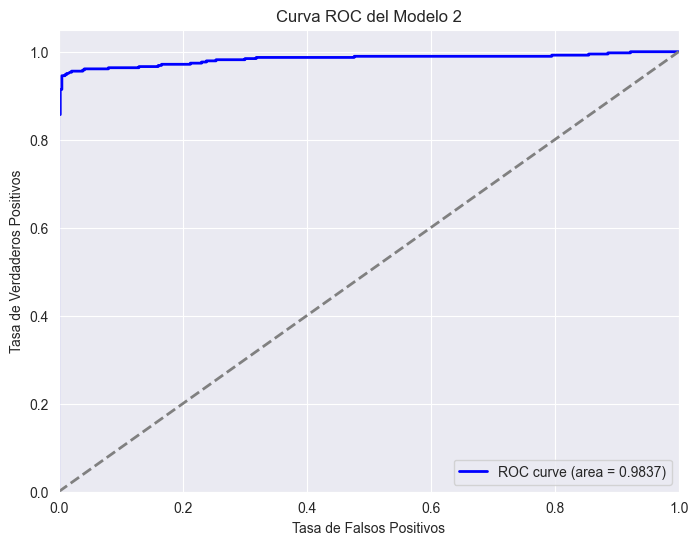

In [40]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC del Modelo 2')
plt.legend(loc='lower right')
plt.savefig('./model_results/roc_curve_model2.png')

Informe de clasificacion

In [41]:
print(classification_report(y_test, y_pred, target_names=['Benigno', 'Malware']))

              precision    recall  f1-score   support

     Benigno       0.96      0.97      0.96       386
     Malware       0.97      0.96      0.96       385

    accuracy                           0.96       771
   macro avg       0.96      0.96      0.96       771
weighted avg       0.96      0.96      0.96       771



Validacion cruzada con k = 10

In [42]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

cv_accuracy = []
cv_precision = []
cv_recall = []
cv_f1 = []
cv_auc = []

for train_idx, val_idx in kfold.split(X_train_embeddings, y_train):
    # Datos de entrenamiento y validación para este fold
    X_fold_train, X_fold_val = X_train_embeddings[train_idx], X_train_embeddings[val_idx]
    y_fold_train, y_fold_val = y_train[train_idx], y_train[val_idx]

    # Crear y entrenar un nuevo modelo
    fold_model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train_embeddings.shape[1],)),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    fold_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Entrenar el modelo en silencio
    fold_model.fit(X_fold_train, y_fold_train, epochs=10, batch_size=32, verbose=0)

    # Predecir en la validación
    y_fold_pred_prob = fold_model.predict(X_fold_val, verbose=0).flatten()
    y_fold_pred = (y_fold_pred_prob > 0.5).astype(int)

    # Calcular métricas
    cv_accuracy.append(accuracy_score(y_fold_val, y_fold_pred))
    cv_precision.append(precision_score(y_fold_val, y_fold_pred))
    cv_recall.append(recall_score(y_fold_val, y_fold_pred))
    cv_f1.append(f1_score(y_fold_val, y_fold_pred))
    cv_auc.append(roc_auc_score(y_fold_val, y_fold_pred_prob))

# Mostrar resultados de la validación cruzada
print(f"CV Accuracy: {np.mean(cv_accuracy):.4f} (±{np.std(cv_accuracy):.4f})")
print(f"CV Precision: {np.mean(cv_precision):.4f} (±{np.std(cv_precision):.4f})")
print(f"CV Recall: {np.mean(cv_recall):.4f} (±{np.std(cv_recall):.4f})")
print(f"CV F1 Score: {np.mean(cv_f1):.4f} (±{np.std(cv_f1):.4f})")
print(f"CV ROC AUC: {np.mean(cv_auc):.4f} (±{np.std(cv_auc):.4f})")

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object 

CV Accuracy: 0.9572 (±0.0155)
CV Precision: 0.9687 (±0.0189)
CV Recall: 0.9456 (±0.0292)
CV F1 Score: 0.9566 (±0.0160)
CV ROC AUC: 0.9885 (±0.0080)


Guardar modelo para comparar

In [44]:
model.save('./models/model2_nn_embeddings.h5')
# also save it as keras recomend, using native keras format
model.save('./models/model2_nn_embeddings.keras', save_format='tf')